In [1]:
#import needed library
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from numpy import std
import pandas as pd
import numpy as np
import nltk
import re

In [2]:
# read the data from local csv file
data = pd.read_csv("C:/Users/CASE/Desktop/234/dreaddit-train.csv")
print(data)


             subreddit post_id sentence_range  \
0              anxiety  9nr40z       [35, 40]   
1                 ptsd  8a2e26     [170, 175]   
2              anxiety  6mlgi9         [0, 5]   
3     domesticviolence  78iim7       [30, 35]   
4                 ptsd  693g89       [35, 40]   
...                ...     ...            ...   
3548  survivorsofabuse  6n7y7k        [5, 10]   
3549           anxiety  9wve2b       [10, 15]   
3550        assistance  9k3fw4        [5, 10]   
3551          homeless  9l7m7d         [0, 5]   
3552        assistance  90bila        [8, 13]   

                                                   text    id  label  \
0     You’re losing control Juststopthinking— —You’r...  1027      1   
1     ISOLATION KILLS US &nbsp; UNTIL YOU CAN FIGHT ...  1287      0   
2     I blame myself. Almost all the time. Especiall...   931      1   
3     Wtf is wrong with this society? ! I’m pissed. ...  1136      1   
4     I feel like I've failed. I keep having this f

Text(0.5, 1.0, 'The correlation between different attributes and stress')

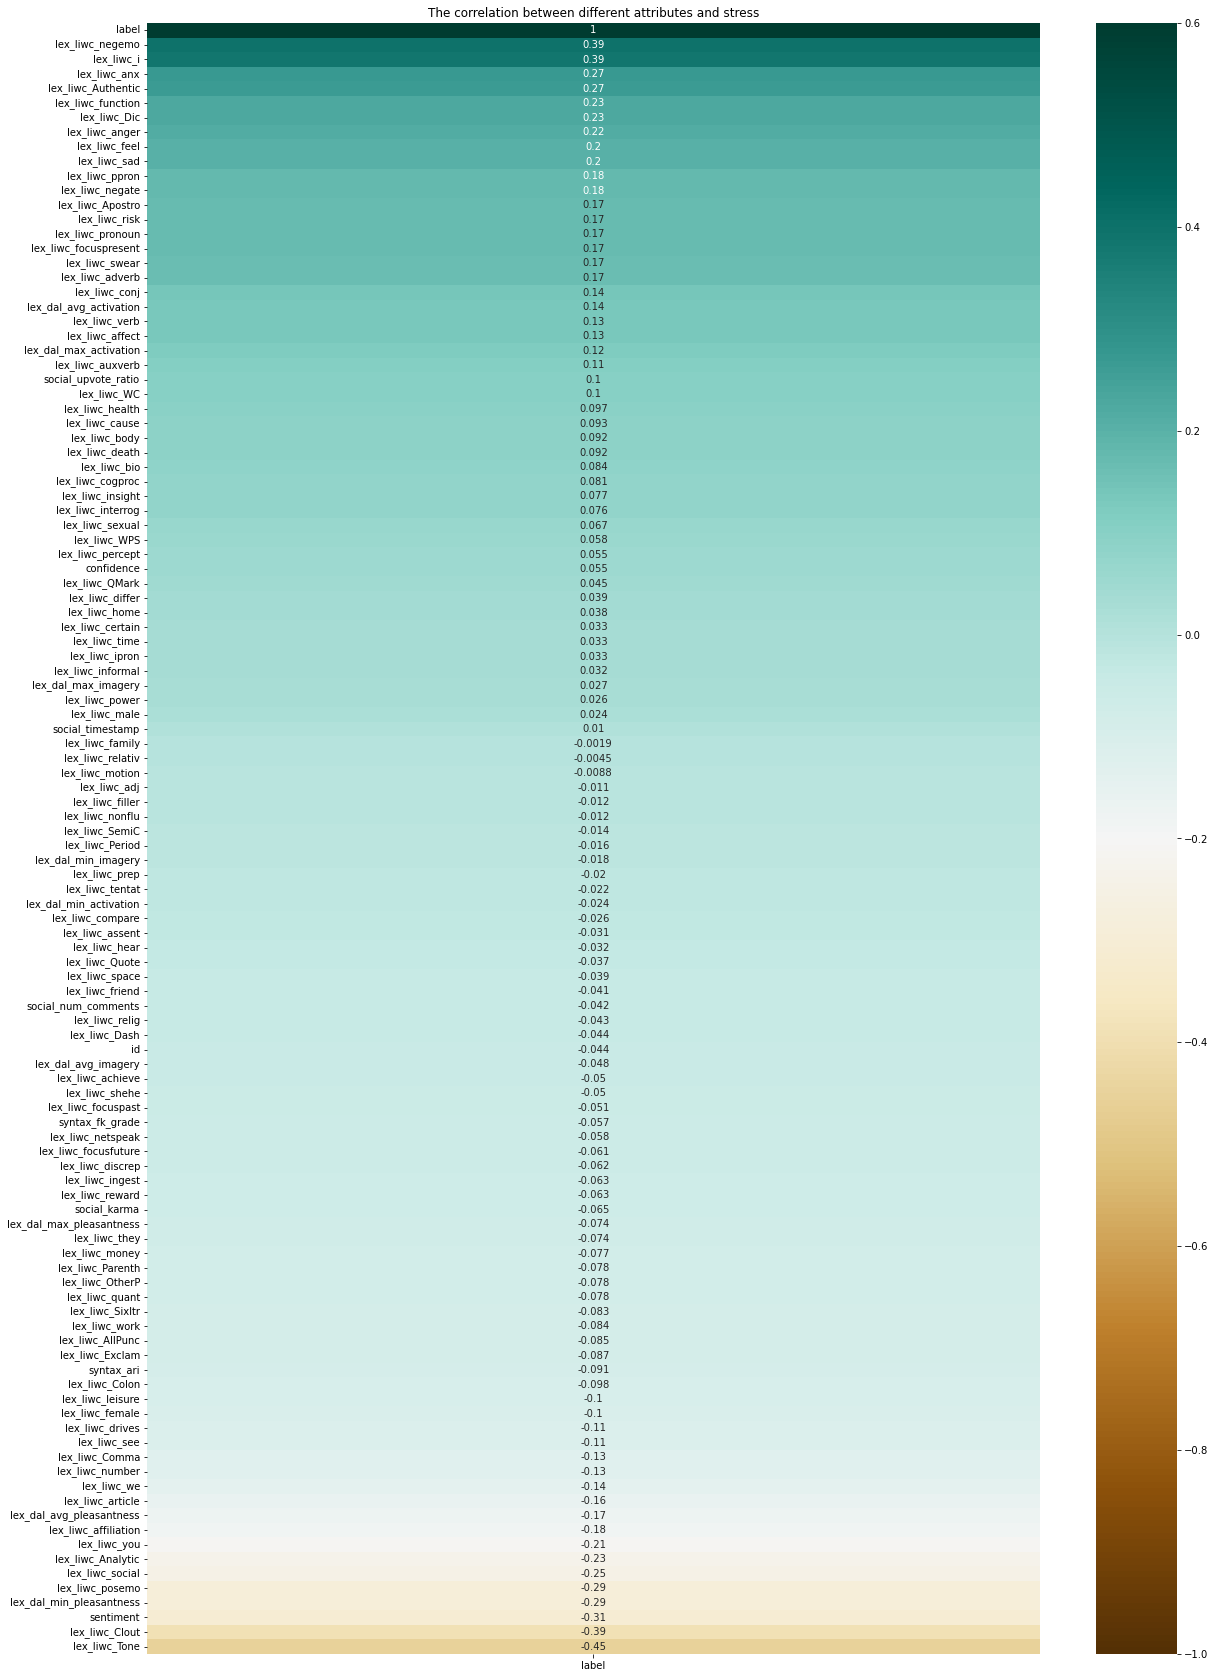

In [8]:
#Visualize the correlation between attributes
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 30))
ax = sns.heatmap(data.corr()[['label']].sort_values(by='label', ascending=False), vmin=-1, vmax=.6, annot=True, cmap='BrBG')
ax.set_title("The correlation between different attributes and stress")

In [3]:
#Data cleaning, use only subreddit for visualization, text and label for train
matrix = data.corr()[['label']].abs()
print(matrix)
for row in matrix.iterrows():
    if row[1][0] < 0.1 and row[1][0] > -0.1:
        data = data.drop(row[0], axis='columns')
data.head()

                             label
id                        0.044450
label                     1.000000
confidence                0.054743
social_timestamp          0.010244
social_karma              0.065297
...                            ...
lex_dal_avg_pleasantness  0.170962
social_upvote_ratio       0.103405
social_num_comments       0.041557
syntax_fk_grade           0.057481
sentiment                 0.307780

[112 rows x 1 columns]


,subreddit,post_id,sentence_range,text,label,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,...,lex_liwc_focuspresent,lex_liwc_swear,lex_liwc_Comma,lex_liwc_Apostro,lex_dal_max_activation,lex_dal_min_pleasantness,lex_dal_avg_activation,lex_dal_avg_pleasantness,social_upvote_ratio,sentiment
0,anxiety,9nr40z,"[35, 40]",You’re losing control Juststopthinking— —You’r...,1,8,1.80,99.00,7.84,1.0,...,25.00,0.00,0.00,25.00,2.2222,1.0000,2.00740,1.58333,1.00,0.000000
1,ptsd,8a2e26,"[170, 175]",ISOLATION KILLS US &nbsp; UNTIL YOU CAN FIGHT ...,0,19,33.88,99.00,19.27,1.0,...,10.53,0.00,5.26,0.00,2.5714,1.3333,1.71327,1.79585,0.92,0.000000
2,anxiety,6mlgi9,"[0, 5]",I blame myself. Almost all the time. Especiall...,1,54,11.88,1.38,99.00,1.0,...,20.37,0.00,5.56,1.85,2.5000,1.0000,1.83493,1.93130,0.83,-0.477273
3,domesticviolence,78iim7,"[30, 35]",Wtf is wrong with this society? ! I’m pissed. ...,1,26,9.98,50.00,17.46,1.0,...,19.23,7.69,0.00,7.69,2.6000,1.0000,1.77073,1.75663,1.00,-0.541667
4,ptsd,693g89,"[35, 40]",I feel like I've failed. I keep having this fe...,1,59,27.64,6.37,84.61,1.0,...,13.56,1.69,5.08,5.08,2.4444,1.0000,1.84537,1.88833,0.76,-0.572024


In [23]:
#download the nedded lib and stopword for tokenizer
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
print(stopword)

{'these', 'whom', 'don', 'and', 'while', 'did', 'doing', "that'll", 'not', 'her', 'below', 'am', 'theirs', 're', 'couldn', 'all', "she's", 'because', 'they', 'wouldn', "you'll", "aren't", "couldn't", 'our', 'ain', 'as', 'then', 'do', 'having', 'yours', 'nor', "haven't", 'after', 'hasn', "wouldn't", 'you', 'be', 'each', 'why', 'those', "weren't", 'off', 'some', 'this', 'who', 'through', 'he', "mustn't", 'very', 'had', 'hers', 'few', 'no', 'themselves', "hadn't", 'if', 'here', 'up', 'we', 'have', 'me', "shouldn't", 'were', 'that', "you're", 'yourselves', 'which', 'being', 'now', 'will', 'can', 'won', 'them', 'for', 'o', 'only', 'into', 'i', 'just', 'about', "won't", 'didn', 'of', 'weren', 'm', 'on', 'to', 'isn', 'shouldn', 'shan', 'ours', 'ma', 'needn', 'been', "mightn't", 'its', 'more', 'than', "don't", 'further', 'under', 'down', 'same', 'she', 'd', 'y', 'or', 'how', 'their', 'doesn', 'him', "needn't", 'with', 'should', 've', 'both', 'yourself', 'hadn', 'herself', 'above', 'once', 'aga

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CASE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
#Tokenizer to "clean" the speech and text
def dataCleaning(inputt):
    inputt = str(inputt).lower()
    inputt = re.sub('\w*\d\w*', '', inputt)
    inputt = re.sub('\[.*?\]', '', inputt)
    inputt = re.sub('<.*?>+', '', inputt)
    inputt = re.sub('x', '', inputt)
    inputt = re.sub('https?://\S+|www\.\S+', '', inputt)
    inputt = re.sub('[%s]' % re.escape(string.punctuation), '', inputt)
    result = []
    for word in inputt.split(' '):
        if word not in stopword:
            result.append(word)
    result= " ".join(result)
    return result
data["text"] = data["text"].apply(dataCleaning)
print(data.text)

0       you’re losing control juststopthinking— —you’r...
1       isolation kills us nbsp fight therapies fight ...
2       blame almost time especially feel bad see unco...
3       wtf wrong society  i’m pissed i’m angry abuser...
4       feel like ive failed keep fear ive made everyt...
                              ...                        
3548    one week start second year bachelor’s degree f...
3549    save get doggo make sure financial stability g...
3550    ive shazamed googled podcast even asked listen...
3551    ok dont normally post much wasnt sure eactly p...
3552    heres link amazon wish list two items  link do...
Name: text, Length: 3553, dtype: object


In [25]:
#rename the label
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                                text      label
0  you’re losing control juststopthinking— —you’r...     Stress
1  isolation kills us nbsp fight therapies fight ...  No Stress
2  blame almost time especially feel bad see unco...     Stress
3  wtf wrong society  i’m pissed i’m angry abuser...     Stress
4  feel like ive failed keep fear ive made everyt...     Stress


In [26]:
#split the dataset into train and test dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
print(x)
y = np.array(data["label"])
print(y)
cv = CountVectorizer()
X = cv.fit_transform(x)

['you’re losing control juststopthinking— —you’re panicking stop —panicking'
 'isolation kills us nbsp fight therapies fight isolation nbsp others'
 'blame almost time especially feel bad see uncomfortable feelings wrong first place fault feel bad makes feel worse feel worse hate hate hating feeling bad'
 ...
 'ive shazamed googled podcast even asked listeners could tell information nothing im hoping someone knows anything band song title  guess called bus song '
 'ok dont normally post much wasnt sure eactly post also trying brag stroke ego honest question happened youngest son  pulling store saw older man standing roadside holding sign'
 'heres link amazon wish list two items  link doesnt work let know etra  hour doesnt seem like much im sole supporter moment family  going make small huge difference us please thank']
['Stress' 'No Stress' 'Stress' ... 'No Stress' 'No Stress' 'No Stress']


In [27]:
import warnings
warnings.filterwarnings('ignore')
# Build and apply six models into the dataset and compare their performance on training and testing sets.
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
model1 = BernoulliNB()
model2 = RandomForestClassifier()
model3 = LogisticRegression()
model4 = AdaBoostClassifier();
model5 = KNeighborsClassifier()
model6 = SVC()

TrainScore1 = []
TrainScore2 = []
TrainScore3 = []
TrainScore4 = []
TrainScore5 = []
TrainScore6 = []

TestScore1 = []
TestScore2 = []
TestScore3 = []
TestScore4 = []
TestScore5 = []
TestScore6 = []

#Train the dataset and calculate the score of the train 10 times to define which model is best for our goal
for i in range (0, 10): 
    #split the data into 8 parts for train and 2 parts for test
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
    model1.fit(xtrain, ytrain)
    model2.fit(xtrain, ytrain)
    model3.fit(xtrain, ytrain)
    model4.fit(xtrain, ytrain)
    model5.fit(xtrain, ytrain)
    model6.fit(xtrain, ytrain)

    TrainScore1.append(model1.score(xtrain, ytrain))
    TrainScore2.append(model2.score(xtrain, ytrain))
    TrainScore3.append(model3.score(xtrain, ytrain))
    TrainScore4.append(model4.score(xtrain, ytrain))
    TrainScore5.append(model5.score(xtrain, ytrain))
    TrainScore6.append(model6.score(xtrain, ytrain))
    
    TestScore1.append(model1.score(xtest, ytest))
    TestScore2.append(model2.score(xtest, ytest))
    TestScore3.append(model3.score(xtest, ytest))
    TestScore4.append(model4.score(xtest, ytest))
    TestScore5.append(model5.score(xtest, ytest))
    TestScore6.append(model6.score(xtest, ytest))


modelsTrainScore = dict()    
modelsTrainScore['Bernoulli'] = TrainScore1
modelsTrainScore['Random Forest'] = TrainScore2
modelsTrainScore['Logistic Regression'] = TrainScore3
modelsTrainScore['Adaboost'] = TrainScore4
modelsTrainScore['KNN'] = TrainScore5
modelsTrainScore['Support Vector Machine'] = TrainScore6

modelsTestScore = dict()
modelsTestScore['Bernoulli'] = TestScore1
modelsTestScore['Random Forest'] = TestScore2
modelsTestScore['Logistic Regression'] = TestScore3
modelsTestScore['Adaboost'] = TestScore4
modelsTestScore['KNN'] = TestScore5
modelsTestScore['Support Vector Machine'] = TestScore6
    

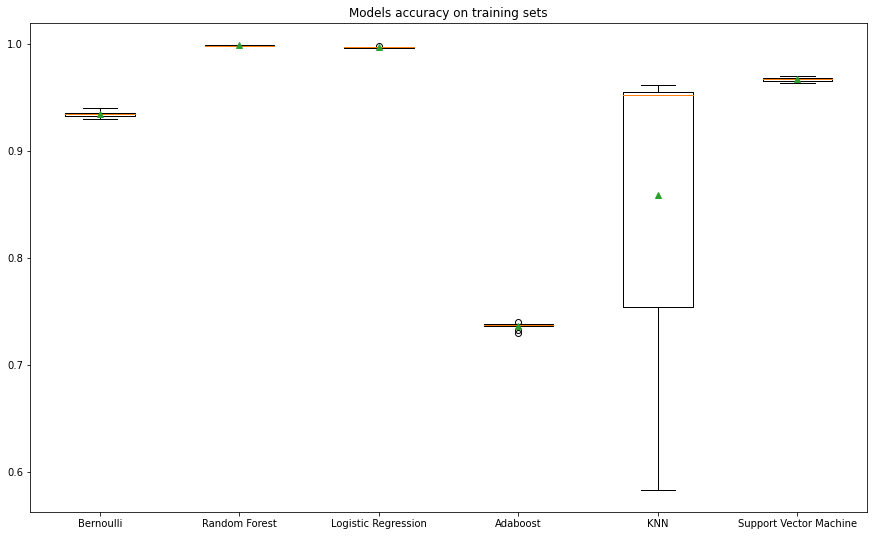

In [28]:
#visualize the result

# evaluate the models and store results
results, names = list(), list()
for name, model in modelsTrainScore.items():
    results.append(model)
    names.append(name)
# plot model performance for comparison
plt.figure(figsize=(15, 9))
plt.title("Models accuracy on training sets")
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

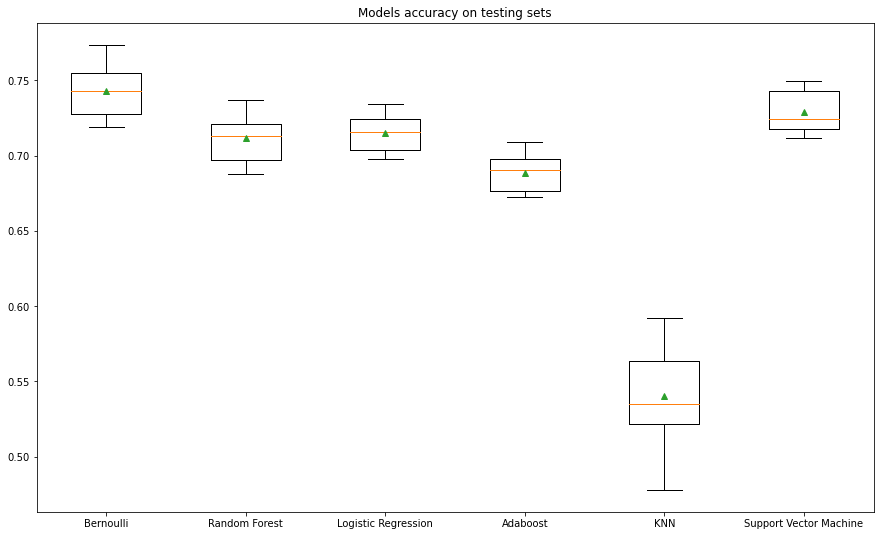

In [29]:
#visualize the result


# evaluate the models and store results
results, names = list(), list()
for name, score in modelsTestScore.items():
    results.append(score)
    names.append(name)
plt.figure(figsize=(15, 9))
plt.title("Models accuracy on testing sets")
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [48]:
# receive the input from the user and predict the result
user = input()
inputed = cv.transform([user]).toarray()
output = model1.predict(inputed)
print(output)



No matter how hard I have tried, I still get a C for my Linear Algebra class. Im very disappointed and feel like my effort is wasted
['Stress']


In [50]:
# receive the input from the user and predict the result
user = input()
inputed = cv.transform([user]).toarray()
output = model1.predict(inputed)
print(output)

I got a C for my Linear Algebra class. I was very disappointed and hopeless at first, but then I heard that my professor curved the class so I get an A now. Im very relieved and thanks to my professor!!!
['No Stress']


In [ ]:
# Merry Christmas!